<h1><center>House Price prediction using machine Learning</center></h1>
<img src="https://images.pexels.com/photos/106399/pexels-photo-106399.jpeg?auto=compress&cs=tinysrgb&dpr=3&h=750&w=1260">

This notebook explores the data about the house price based on the features that determines the price of a house. Using multiple regression model, we are going to find an optimal model that produces highest results

## Table of content

1. [Importing the necessary packages and the dataset](#section1)
2. [Exploring the data](#section2)
3. [Creating multiple utility function](#section3)
4. [Cleaning up the data](#section4)
5. [Creating heatmap to find correlation](#section5)
6. [Encoding the categorical variables](#section6)
7. [Splitting the data as X and y](#section7)
8. [Trying Multiple options with Decision tree and Random forest](#section8)
9. [Conclusion](#section9)

<a id="section1"></a>

## 1. Importing the necessary packages and the dataset

Importing the packages needed

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
# supress deprecated warnings
import warnings
warnings.filterwarnings('ignore')

Loading the dataset and displaying head rows

In [2]:
house_data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv')
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<a id="section2"></a>

## 2. Exploring the data

In [3]:
house_data.shape

(1460, 81)

The dataset contains 1460 rows with 81 features

In [4]:
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Checking the list of columns

In [5]:
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Removing 'Id' column from the dataset as it is irrelavent

In [6]:
house_data.drop('Id', axis=1, inplace=True)

<a id="section3"></a>

## 3. Creating multiple utility function

Creating multiple utility functions which can be reused throughout the notebook. 

You can find the purpose of each method above its definition

In [7]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from datetime import datetime

# function to find and return missing values

def missingValues(df):
    ''' Function to find and return missing values
    '''
    missing = df.isnull().sum()                        # count the number of missing values per columns
    missing = missing[missing > 0]                     # filter columns which has at least one missing value
    missing.sort_values(inplace=True, ascending=False) # sort the values in descending order
    return missing

# function to check and replace NA values with mean/mode values

def prepareData(df):
    ''' Function to check and replace NA values with mean/mode valuse
    '''
    for col in df:                                          # iterate through all columns
        if np.issubdtype(df[col].dtype, np.number):         # if column has numerical type
            df[col].fillna(df[col].mean(), inplace=True)    # replace with mean value
        elif np.sum(df[col].isnull()) > 0:                  # else, if the column has any missing values 
            df[col].fillna(df[col].mode()[0], inplace=True) # replace with mode value

# function to scale and split the data            

def scale_and_split(X, y, isScale=False, test_size=0.25):
    ''' Function to scale and split the data
    '''
    scaled_X = X
    log_y = y
    scaler = None
    if isScale:
        scaler = StandardScaler().fit(X)
        scaled_X = scaler.transform(X)
        log_y = np.log(y)
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, log_y, test_size=test_size, random_state=1)
    return scaler, X_train, X_test, y_train, y_test

# function to calculate and return the model evaluation values

def eval_model(y_test, y_pred):
    ''' Function to calculate and return the model evaluation values
    '''
    mae = mean_absolute_error(y_test, y_pred)     # Mean absolute error
    mse = mean_squared_error(y_test, y_pred)      # Mean squared error
    rmse = np.sqrt(mse)                           # Root mean squared error
    msle = mean_squared_log_error(y_test, y_pred) # Mean squared log error
    r2 = r2_score(y_test, y_pred)                 # R-squared
    return mae, mse, rmse, msle, r2

# function to create Decision tree regressor

def create_decision_tree(X_train, X_test, y_train, y_test, isCV = False, cv_params = None):
    ''' Function to create Decision tree regressor.
    Based on the parameters provided the function create and evaluate the model and returns the result of the evaluations
    '''
    warnings.filterwarnings('ignore')
    dtree = DecisionTreeRegressor(random_state=0)
    if isCV:
        if not cv_params:
            cv_params = [{'max_depth': range(2, 60), 'max_features': ['sqrt', 'log2', None]}]
        starttime = datetime.now()
        grid_search = GridSearchCV(dtree, cv_params, cv=10, refit='AUC')
        grid_search.fit(X_train, y_train)
        dtree_pred = grid_search.predict(X_test)
        endtime = datetime.now()
        mae, mse, rmse, msle, r2 = eval_model(y_test, dtree_pred)
        return (endtime-starttime), mae, mse, rmse, msle, r2
    else:
        starttime = datetime.now()
        dtree.fit(X_train, y_train)
        dtree_pred = dtree.predict(X_test)
        endtime = datetime.now()
        mae, mse, rmse, msle, r2 = eval_model(y_test, dtree_pred)
        return (endtime-starttime), mae, mse, rmse, msle, r2

# function to create Random Forest Regressor

def create_random_forest(X_train, X_test, y_train, y_test, isCV = False, cv_params = None):
    ''' Function to create Random Forest regressor.
    Based on the parameters provided the function create and evaluate the model and returns the result of the evaluations
    '''
    warnings.filterwarnings('ignore')
    rf = RandomForestRegressor(random_state=0)
    if isCV:
        if not cv_params:
            cv_params = {
                'max_depth': range(2, 5),
                'min_samples_split': randint(2, 11),
                'min_samples_leaf': randint(1, 11),
                'bootstrap': [True,False],
                'n_estimators': [100, 400, 700, 1000, 1500],
                'max_features': ['sqrt', 'log2', None]
            }
        n_iter_search = 50
        starttime = datetime.now()
        rand_cv = RandomizedSearchCV(rf, param_distributions=cv_params, n_iter = n_iter_search, n_jobs = -1)
        rand_cv.fit(X_train, y_train)
        rand_pred = rand_cv.predict(X_test)
        endtime = datetime.now()
        mae, mse, rmse, msle, r2 = eval_model(y_test, rand_pred)
        return (endtime-starttime), mae, mse, rmse, msle, r2
    else:
        starttime = datetime.now()
        rf.fit(X_train, y_train)
        rf_pred = rf.predict(X_test)
        endtime = datetime.now()
        mae, mse, rmse, msle, r2 = eval_model(y_test, rf_pred)
        return (endtime-starttime), mae, mse, rmse, msle, r2

<a id="section4"></a>

## 4. Cleaning up the data

Checking the no. of missing values in each column of the dataset and display those having count greater than zero

In [8]:
missingValues(house_data)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

Dropping the columns which has less than 1000 valid values and checking again for the missing count

In [9]:
house_data.dropna(thresh=1000, inplace=True, axis=1)
missingValues(house_data)

LotFrontage     259
GarageCond       81
GarageQual       81
GarageFinish     81
GarageYrBlt      81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
dtype: int64

Preparing the data by replacing the missing values with mean and mode for continuous and categorical respectively, and confirming there are no more missing values

In [10]:
prepareData(house_data)
missingValues(house_data)

Series([], dtype: int64)

<a id="section5"></a>

## 5. Creating heatmap to find correlation

Preparing correlation for all continuous variables with target variable

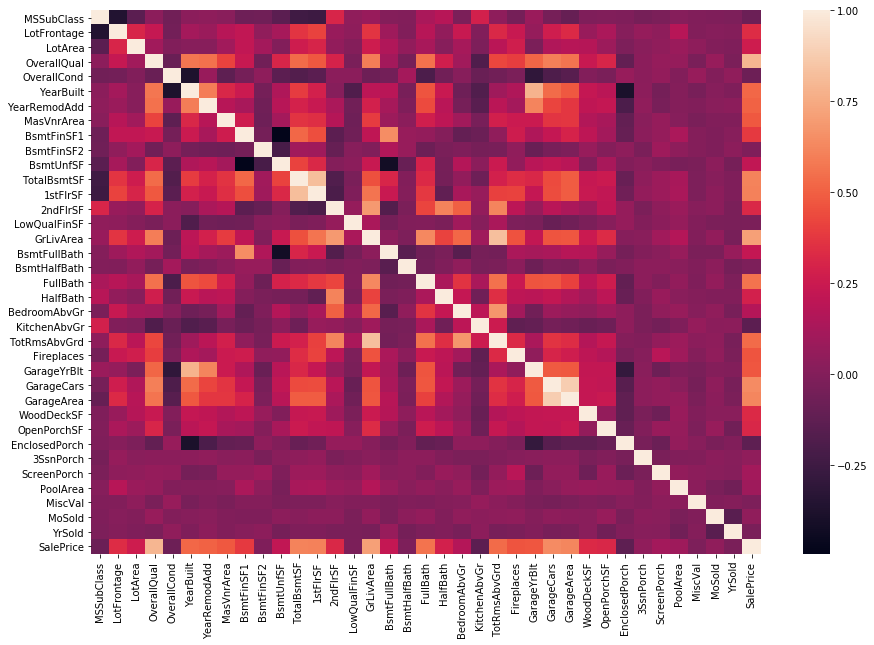

In [11]:
corr_data = house_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_data)

Separating the categorical and continous columns

In [12]:
cat_col = house_data.select_dtypes(include=['object']).columns.to_series().get_values()
cont_col = house_data.select_dtypes(exclude=['object']).columns.to_series().get_values()
print(cat_col)
print(cont_col)

['MSZoning' 'Street' 'LotShape' 'LandContour' 'Utilities' 'LotConfig'
 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2' 'BldgType'
 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'GarageType'
 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive' 'SaleType'
 'SaleCondition']
['MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SalePrice']


In [13]:
house_enc = house_data[cat_col]
house_enc.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [14]:
house_cont = house_data[cont_col]
house_cont.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


<a id="section6"></a>

## 6. Encoding the categorical variables

Encoding the categorical variables and appending it with continuous variables

In [15]:
from sklearn.preprocessing import LabelEncoder
house_enc = house_enc.apply(LabelEncoder().fit_transform)
house_enc.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4


In [16]:
house_final = pd.concat([house_enc, house_cont], axis=1)
house_final.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,3,1,3,3,0,4,0,5,2,2,...,0,61,0,0,0,0,0,2,2008,208500
1,3,1,3,3,0,2,0,24,1,2,...,298,0,0,0,0,0,0,5,2007,181500
2,3,1,0,3,0,4,0,5,2,2,...,0,42,0,0,0,0,0,9,2008,223500
3,3,1,0,3,0,0,0,6,2,2,...,0,35,272,0,0,0,0,2,2006,140000
4,3,1,0,3,0,2,0,15,2,2,...,192,84,0,0,0,0,0,12,2008,250000


<a id="section7"></a>

## 7. Splitting the data as X and y

Splitting the data into independent and dependent variables as X and y respectively

In [17]:
X = house_final.drop('SalePrice', axis=1)
y = house_final['SalePrice']

print('X Shape {}'.format(X.shape))
print('y Shape {}'.format(y.shape))

X Shape (1460, 74)
y Shape (1460,)


<a id="section8"></a>

## 8. Trying Multiple options with Decision tree and Random forest

Initializing variables for multiple options to try with the models

In [18]:
test_sizes = [0.15, 0.2, 0.25, 0.3, 0.35, 0.4]                      # arary of test sizes to be used when training model
isScaled = [False, True]                                            # variable to check whether to scale the data or not
results = []                                                        # array to store the results of each model 
index = []                                                          # to store the name of ML used against the model
columns = ['Scaled', 'Test size', 'Time taken', 'MAE', 'MSE', 'RMSE', 'MSLE', 'R2'] # parameters and results column to create a dataframe

Iterating a set of variables and creating models for multiple values and storing the results in a separate variable

In [19]:
starttime = datetime.now()       # marking the start of the entire model training process
for isScale in isScaled:         # looping thru' items in isScaled array 
    for test_size in test_sizes: # looping thru' items in test_sizes arary
        _, X_train, X_test, y_train, y_test = scale_and_split(X, y, isScale, test_size) #splititng the dataset based on the test_size
        print('*'*80)
        print('Decision tree with {} value with test size of {}'.format(('scaled' if isScale else 'original'), test_size))
        index.append('Decision Tree')
        time_taken, mae, mse, rmse, msle, r2 = create_decision_tree(X_train, X_test, y_train, y_test) # function to train model
        results.append([isScale, test_size, time_taken, mae, mse, rmse, msle, r2]) # appending the results to the result array
        print('*'*80)
        print('Decision tree CV with {} value with test size of {}'.format(('scaled' if isScale else 'original'), test_size))
        index.append('Decision Tree CV')
        time_taken, mae, mse, rmse, msle, r2 = create_decision_tree(X_train, X_test, y_train, y_test, True) # function to train model
        results.append([isScale, test_size, time_taken, mae, mse, rmse, msle, r2]) # appending the results to the result array
        print('*'*80)
        print('Random forest with {} value with test size of {}'.format(('scaled' if isScale else 'original'), test_size))
        index.append('Random Forest')
        time_taken, mae, mse, rmse, msle, r2 = create_random_forest(X_train, X_test, y_train, y_test) # function to train model
        results.append([isScale, test_size, time_taken, mae, mse, rmse, msle, r2]) # appending the results to the result array
        print('*'*80)
        print('Random forest CV with {} value with test size of {}'.format(('scaled' if isScale else 'original'), test_size))
        index.append('Random Forest CV')
        time_taken, mae, mse, rmse, msle, r2 = create_random_forest(X_train, X_test, y_train, y_test, True) # function to train model
        results.append([isScale, test_size, time_taken, mae, mse, rmse, msle, r2]) # appending the results to the result array
endtime = datetime.now()         # marking the end of the entire model training process
print('Overall runtime {}'.format((endtime-starttime))) # displaying the overall time taken for the model training 
results_df = pd.DataFrame(results, columns=columns, index=index) # creating a dataframe for the list of results

********************************************************************************
Decision tree with original value with test size of 0.15
********************************************************************************
Decision tree CV with original value with test size of 0.15
********************************************************************************
Random forest with original value with test size of 0.15
********************************************************************************
Random forest CV with original value with test size of 0.15
********************************************************************************
Decision tree with original value with test size of 0.2
********************************************************************************
Decision tree CV with original value with test size of 0.2
********************************************************************************
Random forest with original value with test size of 0.2
****************************

Displaying the results sets ordering by R-squared valueu and MSLE

In [20]:
results_df.sort_values(['R2', 'MSLE'], ascending=[False, True])

,Scaled,Test size,Time taken,MAE,MSE,RMSE,MSLE,R2
Random Forest,False,0.15,00:00:00.312882,16010.574429,5.182287e+08,22764.636424,0.020405,0.920040
Random Forest,False,0.20,00:00:00.232549,17467.646918,7.915036e+08,28133.673734,0.024228,0.889020
Random Forest,False,0.25,00:00:00.223355,17862.902740,7.506323e+08,27397.668715,0.022894,0.888186
Random Forest,False,0.30,00:00:00.245639,18773.155708,8.432271e+08,29038.372223,0.029526,0.881906
Random Forest,True,0.15,00:00:00.248706,0.097774,2.057914e-02,0.143454,0.000127,0.878796
Random Forest,False,0.35,00:00:00.200209,19409.944423,8.908263e+08,29846.712590,0.028314,0.869769
Random Forest CV,False,0.15,00:01:57.344437,21044.585017,8.815908e+08,29691.594891,0.033322,0.863976
Random Forest,True,0.35,00:00:00.174854,0.105033,2.466762e-02,0.157059,0.000154,0.863454
Random Forest,True,0.25,00:00:00.213183,0.107009,2.292064e-02,0.151396,0.000140,0.863242
Random Forest,True,0.20,00:00:00.271892,0.109076,2.448594e-02,0.156480,0.000151,0.858916


<a id="section9"></a>

## 9. Conclusion

Overall, there were 48 models trained and tested. Among those, the random forest model with test size of 0.15 has the highest Accuracy of 92%. The same model has a consistent accuracy of 88% for the test sizes of 0.20, 0.25 and 0.3. From this, we can conclude that, this model performs well and predicts better with less error compared to the other models.

*****************************************************************************************